In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
#pylab inline
from mpl_toolkits.basemap import Basemap
colors = sns.color_palette()
import glob
import time, datetime

In [33]:
mi_files = glob.glob("/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/*.CSV")

#dat = pd.read_csv("/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/Data for RSF study/RSFData_MI/GPS_Collar36635_033116.CSV")

In [10]:
mi_files

['/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar38313_033116.CSV',
 '/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar38308_091516.CSV',
 '/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar38307_033116.CSV',
 '/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar38309_033116.CSV',
 '/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar38306_091416.CSV',
 '/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar36635_033116.CSV',
 '/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar38303_033116.CSV',
 '/Users/mqwilber/Desktop/Data_for_Mark/GPS_data/DataforRSFstudy/RSFData_MI/GPS_Collar38312_033116.CSV']

<IPython.core.display.Javascript object>


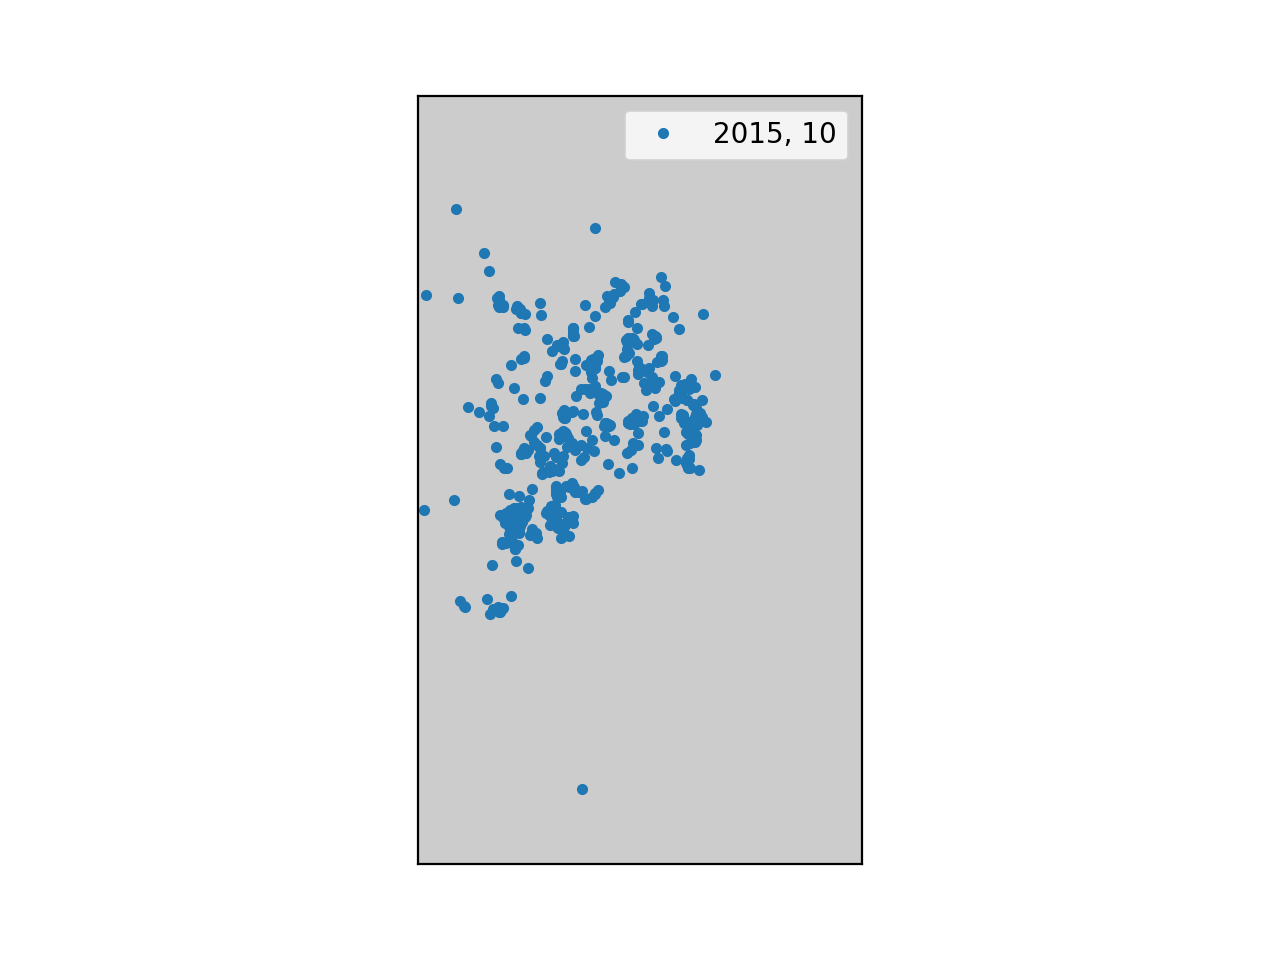

In [61]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])

# setup mercator map projection.
m = Basemap(llcrnrlon=-140.,llcrnrlat=20.,urcrnrlon=-40.,urcrnrlat=53.,
                resolution='l',projection='merc')


for fl in [mi_files[0]]:
    
    dat = pd.read_csv(fl)
    dattime = pd.to_datetime(dat[u'Date & Time [GMT]'])
    
    # Subset to a specific movement month

    # Convert lat long to map coordinates
    x, y = m(dat.Longitude.values, dat.Latitude.values)

    m.drawcoastlines()
    m.fillcontinents(zorder=-1)
    #m.fillcontinents()

    years = np.array([a.year for a in dattime])
    months = np.array([a.month for a in dattime])
    
    # Just looking at one movement trajectory
    ind = (pd.Series(years) == 2015) & (pd.Series(months) == 10)
    ax.plot(x[ind], y[ind], 'o', ms=3, label="2015, 10")
    #ax.plot(x[ind], y[ind], '-', color="black")
    
ax.legend()

In [43]:
np.where(dat.Latitude == dat.Latitude[years == 2015].min())

(array([4349]),)

In [45]:
dat.drop(4349).shape

(4625, 11)

In [46]:
dat.shape

(4626, 11)

In [16]:
time.mktime(dattime[0].timetuple())

1440181812.0

In [32]:
posixtime = [time.mktime(dt.timetuple()) for dt in dattime]


1818.0

In [5]:
dattime = pd.to_datetime(dat[u'Date & Time [GMT]'])